In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd


sns.set_style('white')  
sns.set_style('ticks', {'axes.grid': True})
sns.set_context("paper", font_scale = 2)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

dirname = 'figs/'
csv_dir = 'csvs/'
import os

os.makedirs(dirname, exist_ok=True)

In [2]:
files = ["wandb_export_2024-03-10T16_09_17.122+05_30.csv","wandb_export_2024-03-10T16_10_15.163+05_30.csv","wandb_export_2024-03-10T16_12_41.781+05_30.csv","wandb_export_2024-03-10T16_13_13.045+05_30.csv", "wandb_export_2024-03-10T16_14_09.226+05_30.csv"]
len(files)

5

In [3]:
def process_header(header):
    names = header.split("_")
    names[0] = names[0].upper()
    names[1] = names[1].title()
    
    return " ".join(names)

MRM Loss
MLM Loss
MIM Loss
ITC Loss
ITM Loss


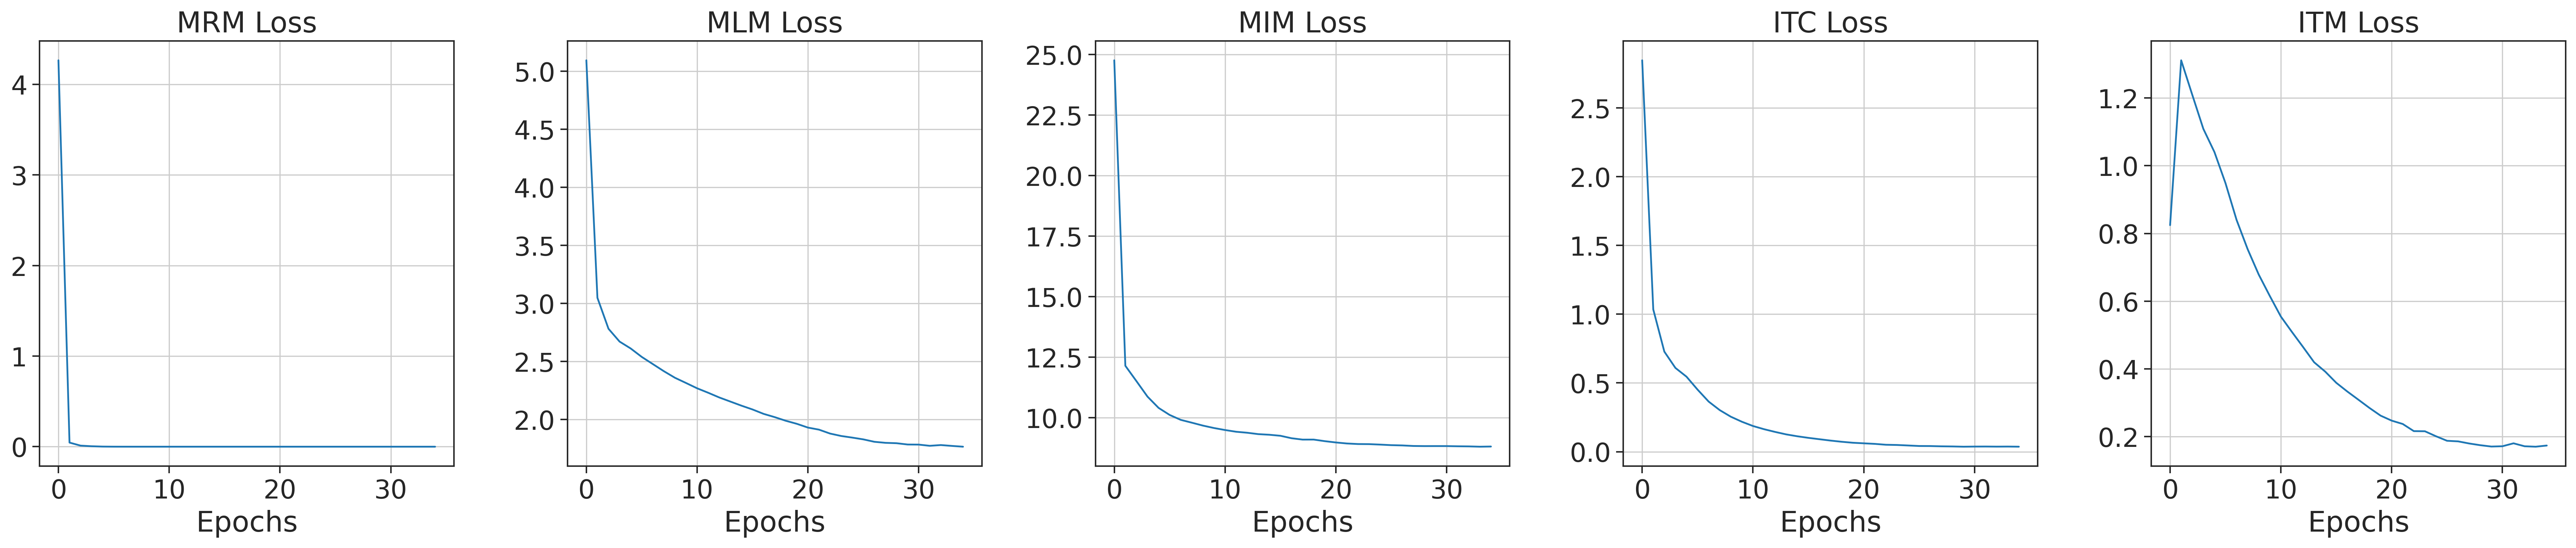

In [14]:
fig, axd = plt.subplot_mosaic([[1,2,3,4,5]],#[1, 1, 2, 2, 3, 3],
                               #['.', 4, 4, 5, 5, '.']],
                              figsize=(25, 5), layout="tight")
plt.tight_layout()

for idx, (filename, curaxd) in enumerate(zip(files, axd.values())):
    lines = []
    with open(csv_dir + filename, "r") as f:
        f1 = csv.reader(f)
        for i in f1:
            lines.append(i)
            
    header = lines[0]
    title = header[1].split()[-1]
    title = process_header(title)
    print(title)
    
    lines = lines[1:]
    
    lls = [[],[],[],[]]
    for steps, l1,l2,l3 in lines:
        lls[0].append(float(steps))
        lls[1].append(float(l1))
        lls[2].append(float(l2))
        lls[3].append(float(l3))

    curaxd.set_title(title)
    curaxd.plot(lls[0], lls[1])
    # plt.plot(lls[0], lls[2], label=header[2])
    # plt.plot(lls[0], lls[3], label=header[3])
    curaxd.set_xlabel("Epochs")
    # curaxd.tight_layout()
    

plt.savefig(dirname + "clubbed.pdf")
# l = input()
# if l == "y":
    # plt.savefig("PRETRAIN.png")

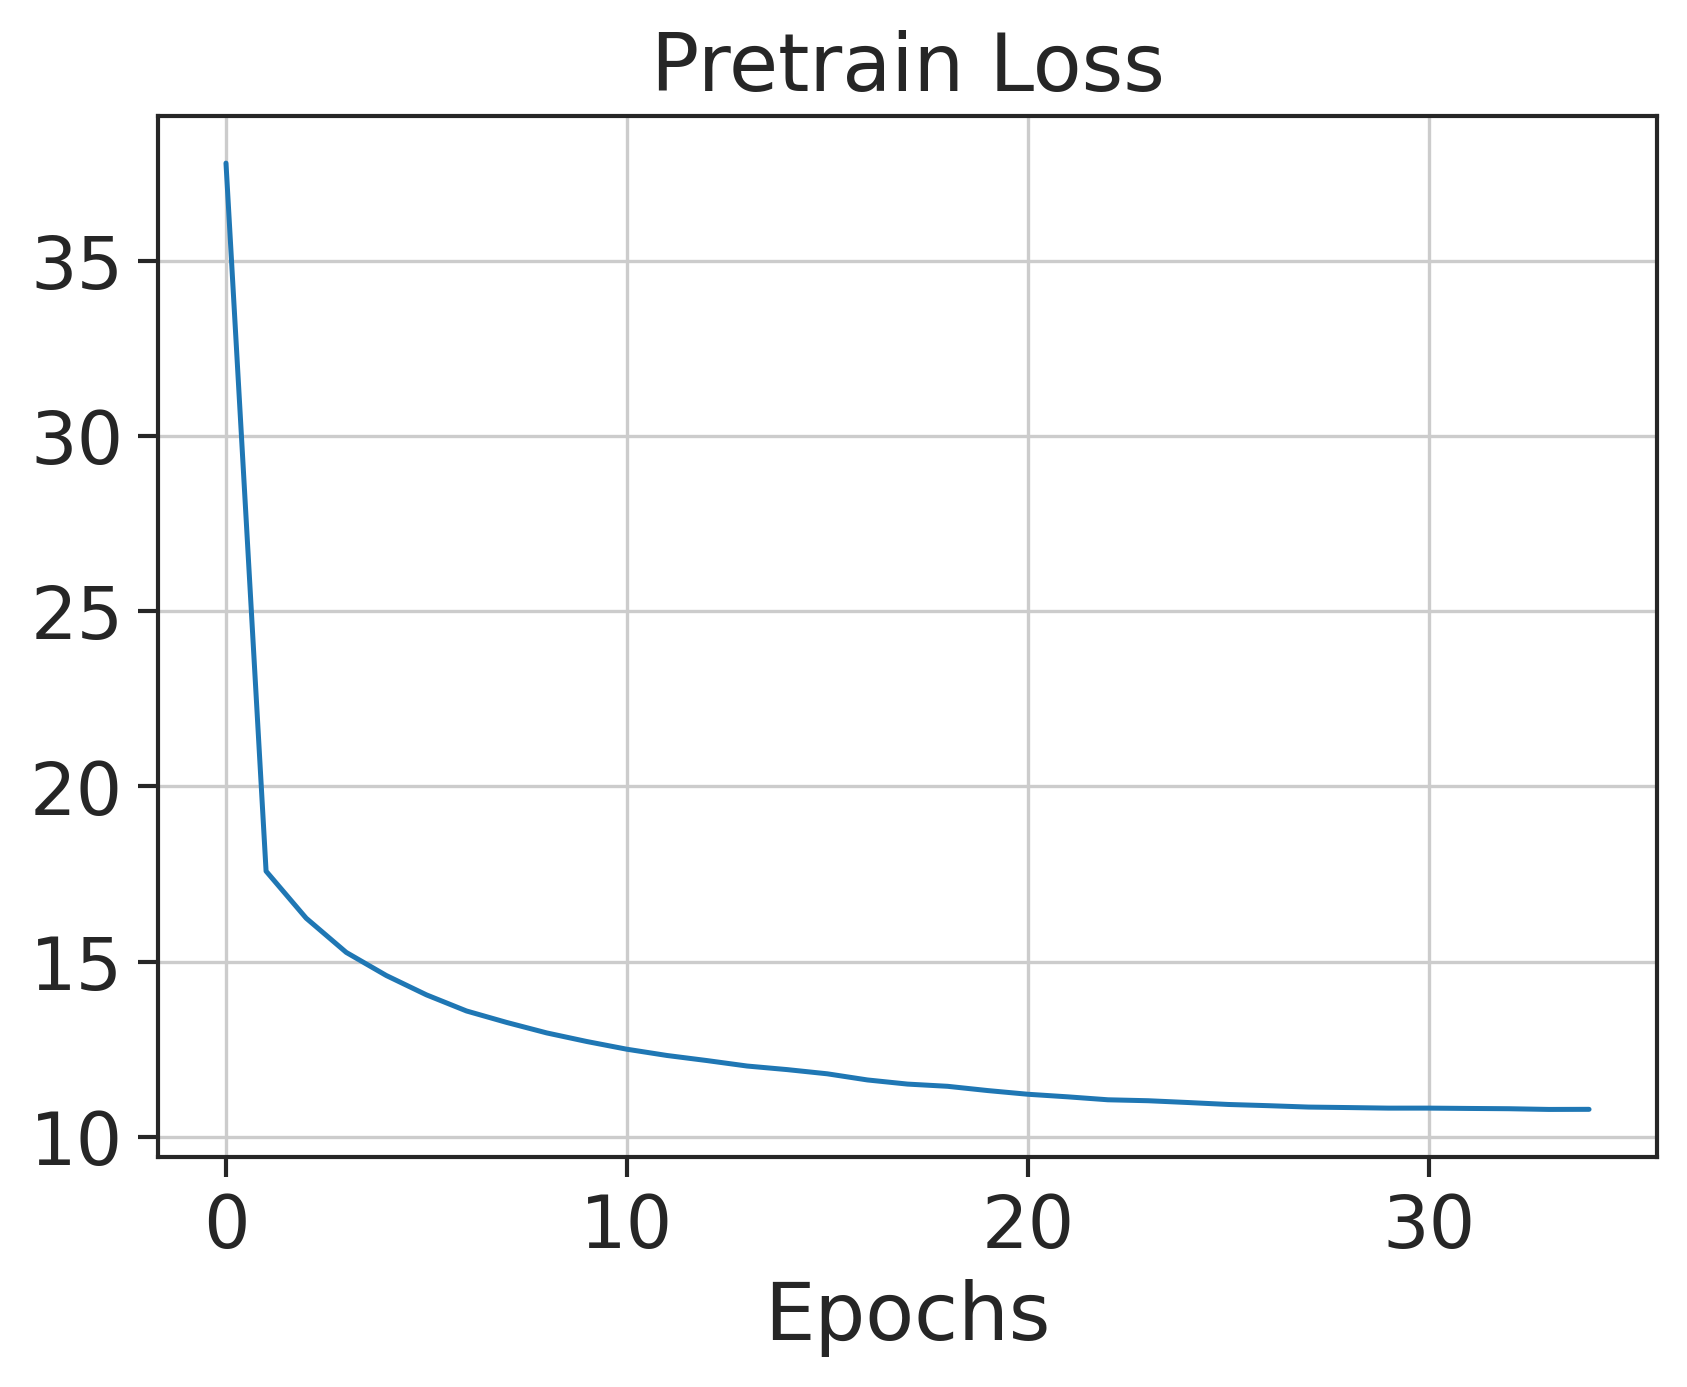

In [5]:
# fig, ax = plt.subplots(1,1, figsize = (6,6))

plt.subplots(figsize = (6, 5))
pd.read_csv(csv_dir + "PRETRAIN LOSS.csv").iloc[:, :2].rename(columns = {'MAMO - ViT-S, BERT-S - pretrain_loss': 'Pretrain Loss'})['Pretrain Loss'].plot(kind = 'line')
plt.title("Pretrain Loss")
plt.xlabel("Epochs")
plt.tight_layout()
plt.savefig(dirname + "pretrain_loss.pdf")